# Crime trends in Chicago
- Numann Malik
- Friday March 31st 2023

In [1]:
# Relevant libraries
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
folder = "Data/Chicago/"
crime_files = sorted(glob.glob(folder+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,3769790,01/01/2001 01:00:00 PM,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,523,5.0,34.0,41.673171,-87.638000
1,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2,1358218,01/01/2001 01:00:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,312,3.0,NaN,41.778744,-87.612135
3,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,41.789084,-87.620849
4,1309918,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.0,NaN,41.940001,-87.654258
...,...,...,...,...,...,...,...,...,...,...,...,...
52373,13020485,03/22/2023 12:52:00 PM,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,111,1.0,42.0,41.883475,-87.627877
52374,13017961,03/22/2023 12:53:00 PM,CRIMINAL TRESPASS,TO LAND,SMALL RETAIL STORE,True,False,1921,19.0,47.0,41.954045,-87.686343
52375,13018787,03/22/2023 12:55:00 PM,BATTERY,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,SCHOOL - PUBLIC GROUNDS,False,False,1915,19.0,46.0,41.959923,-87.649859
52376,13018716,03/22/2023 12:59:00 PM,THEFT,RETAIL THEFT,DRUG STORE,False,False,423,4.0,10.0,41.729171,-87.551235


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7763122 entries, 0 to 52377
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 666.3+ MB


In [4]:
# Missing Values
df.isna().sum()

ID                           0
Date                         0
Primary Type                 0
Description                  0
Location Description     10233
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Latitude                 85949
Longitude                85949
dtype: int64

## Comparing Police Districts:
- Which district has the most crimes? Which has the least?

In [5]:
df['District'].value_counts()

8.0     521830
11.0    498507
6.0     453850
7.0     449480
25.0    441746
4.0     440736
3.0     393770
12.0    384334
9.0     379433
2.0     367298
19.0    348299
18.0    348282
5.0     344152
10.0    334418
15.0    333056
1.0     313425
14.0    300414
16.0    259649
22.0    254414
24.0    234425
17.0    224100
20.0    137221
31.0       232
21.0         4
Name: District, dtype: int64

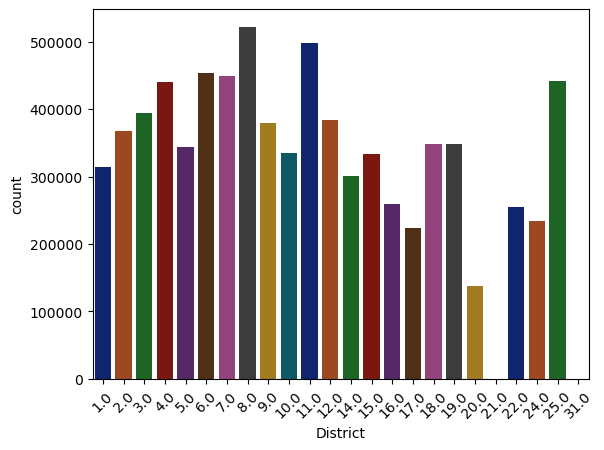

In [34]:
chart = sns.countplot(data=df, x='District',palette='dark')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

<AxesSubplot: >

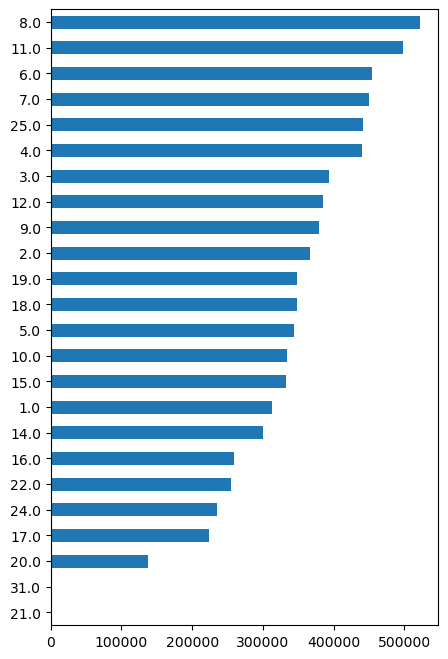

In [7]:
crime_counts = df['District'].value_counts()
crime_counts.sort_values().plot(kind='barh',figsize=(5,8))

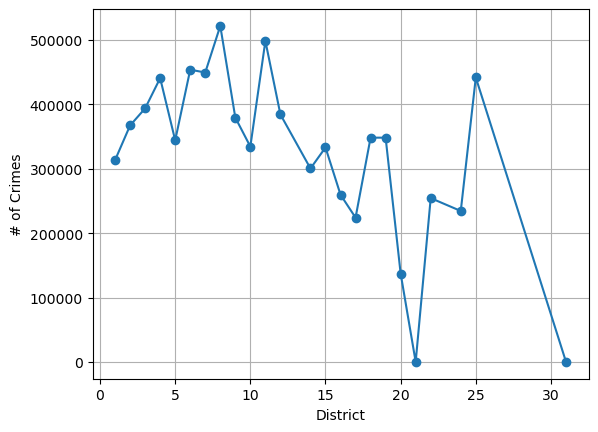

In [8]:
district_counts = df['District'].value_counts().sort_index()
district_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='District');

In [9]:
DC_counts = df['District'].value_counts().to_frame('Total # of Crimes')
DC_counts.style.bar('Total # of Crimes')

,Total # of Crimes
8.000000,521830
11.000000,498507
6.000000,453850
7.000000,449480
25.000000,441746
4.000000,440736
3.000000,393770
12.000000,384334
9.000000,379433
2.000000,367298


Since 2001:
- District 8 has had the most crimes, with count 521,830
- District 21 has had the least, with count 4

## Crimes Across the Years:
- Is the total number of crimes increasing or decreasing across the years?
- Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [10]:
df['datetime'] = pd.to_datetime(df['Date'])
df1 = df.set_index('datetime')
df1

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
datetime,,,,,,,,,,,,
2001-01-01 13:00:00,3769790,01/01/2001 01:00:00 PM,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,523,5.0,34.0,41.673171,-87.638000
2001-01-01 01:00:00,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 13:00:00,1358218,01/01/2001 01:00:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,312,3.0,NaN,41.778744,-87.612135
2001-01-01 01:00:00,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,41.789084,-87.620849
2001-01-01 01:00:00,1309918,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.0,NaN,41.940001,-87.654258
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-22 12:52:00,13020485,03/22/2023 12:52:00 PM,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,111,1.0,42.0,41.883475,-87.627877
2023-03-22 12:53:00,13017961,03/22/2023 12:53:00 PM,CRIMINAL TRESPASS,TO LAND,SMALL RETAIL STORE,True,False,1921,19.0,47.0,41.954045,-87.686343
2023-03-22 12:55:00,13018787,03/22/2023 12:55:00 PM,BATTERY,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,SCHOOL - PUBLIC GROUNDS,False,False,1915,19.0,46.0,41.959923,-87.649859


In [11]:
df1['Year'] = df1.index.year

In [12]:
df1['Year'].value_counts()

2002    486801
2001    485875
2003    475979
2004    469420
2005    453770
2006    448174
2007    437082
2008    427164
2009    392818
2010    370494
2011    351959
2012    336261
2013    307463
2014    275731
2016    269783
2017    269057
2018    268761
2015    264751
2019    261227
2022    237604
2020    212062
2021    208508
2023     52378
Name: Year, dtype: int64

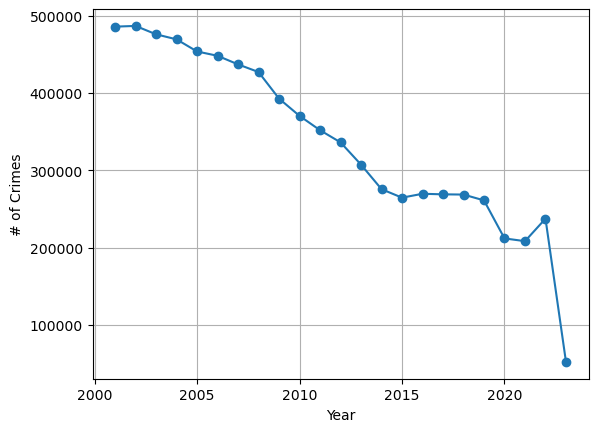

In [13]:
year_counts = df1['Year'].value_counts().sort_index()
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year');

Overall, the number of total crimes tend to decrease over the years, with a few exceptions. The most notable exception is from 2021 to 2022, where there was a notable increase from 208,508 to 237,604.

In [14]:
## Get # of crimes by Year
crimes_by_year = df1.groupby('Primary Type')['Year'].value_counts().sort_index()
crimes_by_year

Primary Type       Year
ARSON              2001    1011
                   2002    1032
                   2003     955
                   2004     778
                   2005     691
                           ... 
WEAPONS VIOLATION  2019    6339
                   2020    8432
                   2021    8979
                   2022    8740
                   2023    1821
Name: Year, Length: 719, dtype: int64

In [15]:
## convert to dataframe and reset_index()
CY_df = crimes_by_year.to_frame('# of Crimes').reset_index()
CY_df

,Primary Type,Year,# of Crimes
0,ARSON,2001,1011
1,ARSON,2002,1032
2,ARSON,2003,955
3,ARSON,2004,778
4,ARSON,2005,691
...,...,...,...
714,WEAPONS VIOLATION,2019,6339
715,WEAPONS VIOLATION,2020,8432
716,WEAPONS VIOLATION,2021,8979
717,WEAPONS VIOLATION,2022,8740


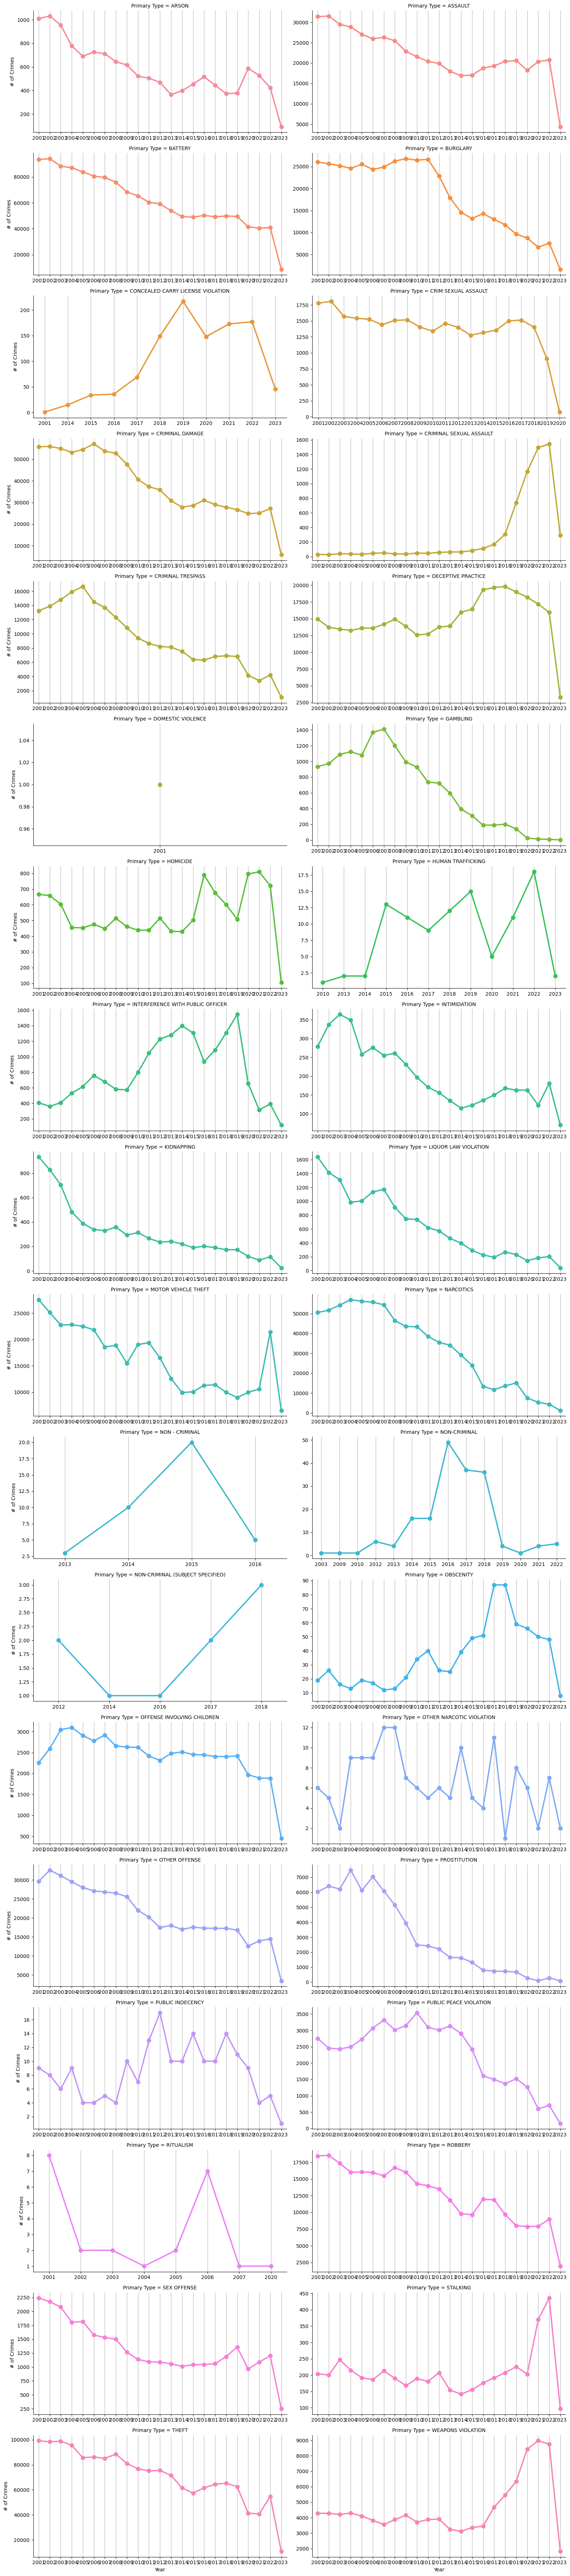

In [16]:
g = sns.catplot(data=CY_df, x='Year', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

- The total number of crimes in general has been decreasing over the years, and this appears to be the case for many different types of crimes.
- However, there are a few crime types that have been trending in the opposite direction (i.e. increasing over the years in general). These include: Obscenity, Stalking, Weapons Violation, and Criminal Sexual Assault.

## Comparing Months:
- What months have the most crime? What months have the least?
- Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [37]:
# Ignore 2023 for fair months comparison
df2 = df1.loc['2001':'2022']
df2

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Year,Month
datetime,,,,,,,,,,,,,,
2001-01-01 13:00:00,3769790,01/01/2001 01:00:00 PM,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,523,5.0,34.0,41.673171,-87.638000,2001,January
2001-01-01 01:00:00,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,2001,January
2001-01-01 13:00:00,1358218,01/01/2001 01:00:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,312,3.0,NaN,41.778744,-87.612135,2001,January
2001-01-01 01:00:00,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,41.789084,-87.620849,2001,January
2001-01-01 01:00:00,1309918,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.0,NaN,41.940001,-87.654258,2001,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669,2022,December
2022-12-31 12:50:00,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966,2022,December
2022-12-31 12:52:00,12938420,12/31/2022 12:52:00 PM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657,2022,December


In [38]:
df2['Month'] = df2.index.month

In [39]:
df2['Month'].value_counts()

7     717031
8     710190
5     682770
6     681553
10    676077
9     668022
3     629550
4     626988
11    608766
1     601021
12    579491
2     529285
Name: Month, dtype: int64

In [40]:
# Create replacement dictionary 
replacement_dict = {1:'January',2:'February',3:'March',4:'April',
                   5:'May',6:'June',7:'July',8:'August',9:'September',
                    10:'October',11:'November',12:'December'}
# Replace values using replacement dictionary
df2['Month'] = df2['Month'].replace(replacement_dict)
df2['Month'].value_counts()

July         717031
August       710190
May          682770
June         681553
October      676077
September    668022
March        629550
April        626988
November     608766
January      601021
December     579491
February     529285
Name: Month, dtype: int64

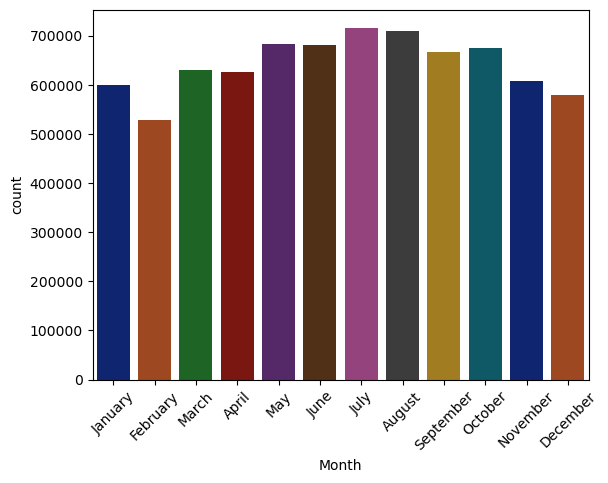

In [41]:
chart = sns.countplot(data=df2, x='Month',palette='dark')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

In [42]:
month_counts = df2['Month'].value_counts().to_frame('Total # of Crimes')
month_counts.style.bar('Total # of Crimes')

,Total # of Crimes
July,717031
August,710190
May,682770
June,681553
October,676077
September,668022
March,629550
April,626988
November,608766
January,601021


Between 2001 and 2022:
- July has had the most crimes with count 717,031
- February has had the least with count 529,285

More generally, hotter months have more crime than colder months.

In [43]:
## Get # of crimes by Month
crimes_by_month = df2.groupby('Primary Type')['Month'].value_counts().sort_index()
crimes_by_month

Primary Type       Month    
ARSON              April        1099
                   August       1183
                   December      923
                   February      807
                   January       917
                                ... 
WEAPONS VIOLATION  March        8167
                   May          9934
                   November     7951
                   October      9188
                   September    9433
Name: Month, Length: 415, dtype: int64

In [44]:
## convert to dataframe and reset_index()
CM_df = crimes_by_month.to_frame('# of Crimes').reset_index()
CM_df

,Primary Type,Month,# of Crimes
0,ARSON,April,1099
1,ARSON,August,1183
2,ARSON,December,923
3,ARSON,February,807
4,ARSON,January,917
...,...,...,...
410,WEAPONS VIOLATION,March,8167
411,WEAPONS VIOLATION,May,9934
412,WEAPONS VIOLATION,November,7951
413,WEAPONS VIOLATION,October,9188


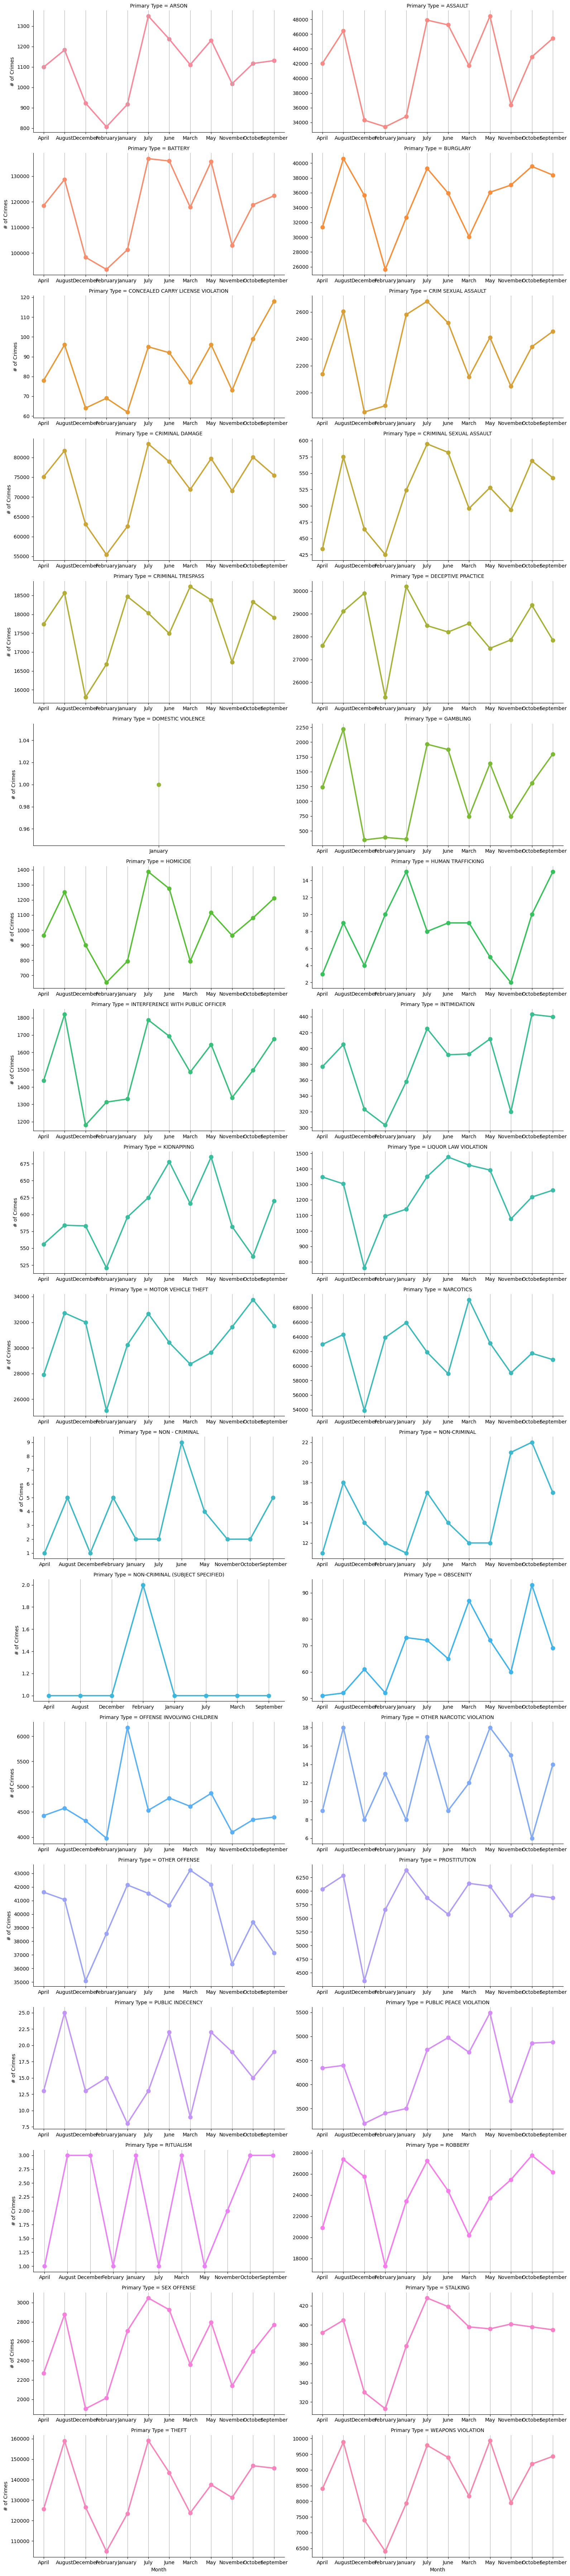

In [45]:
g = sns.catplot(data=CM_df, x='Month', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

Prostitution and Human Trafficking appear to be two types of crimes that go against seasonal trends. In particular, they're mostly frequently committed in January.

## Comparing AM vs. PM Rush Hour:
- Are crimes more common during AM rush hour or PM rush hour?
 - You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
 - You can consider any crime that occurred between 4 -7 PM as PM rush hour.
- What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
- Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

## Comparing Holidays:
- Are there any holidays that show an increase in the # of crimes?
- Are there any holidays that show a decrease in the # of crimes?